# Introduction to neural network classification with TensorFlow

A classification is where you try yo classify something as on thing or another.

A few types of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 10000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [2]:
# Check the features
X

array([[ 0.0464692 ,  0.82477834],
       [ 1.00506323, -0.43335153],
       [-0.58348442,  0.79452834],
       ...,
       [ 0.6854581 ,  0.37297955],
       [ 0.47440334,  0.88491997],
       [-0.67440999,  0.26094865]])

In [3]:
# Check the labels
y

array([1, 0, 0, ..., 1, 0, 1])

The data is a little hard to understand right now... let´s visualize it.

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.046469,0.824778,1
1,1.005063,-0.433352,0
2,-0.583484,0.794528,0
3,0.984783,-0.325179,0
4,0.829930,-0.547223,0
...,...,...,...
9995,0.505764,0.662722,1
9996,0.790650,0.218306,1
9997,0.685458,0.372980,1
9998,0.474403,0.884920,0


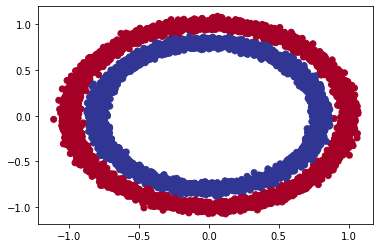

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [6]:
# Check the shape of our features and labels
X.shape, y.shape

((10000, 2), (10000,))

In [7]:
X[:10], y[:10]

(array([[ 0.0464692 ,  0.82477834],
        [ 1.00506323, -0.43335153],
        [-0.58348442,  0.79452834],
        [ 0.98478298, -0.32517879],
        [ 0.82993028, -0.54722305],
        [-0.13392877,  0.77624858],
        [ 0.77919743,  0.64581132],
        [ 0.72295477,  0.17383084],
        [-0.12180665,  0.79695076],
        [ 0.84952936,  0.50567829]]), array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0]))

In [8]:
# How many samples we're working with
len(X), len(y)

(10000, 10000)

In [9]:
# View the first example of features and labels
X[10], y[10]

(array([-0.92287711, -0.31288882]), 0)

## Steps in modelling
First try

In [10]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)
len(X), len(X_train), len(X_test)

(10000, 8000, 2000)

In [11]:
import tensorflow as tf

# Build a neural network to fit the data
tf.random.set_seed(42)

# 1. Create a model
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", mode="min", patience=10)
first_model = tf.keras.Sequential([
  tf.keras.Input(shape = 2),
  tf.keras.layers.Dense(100, activation = "relu"),
  #tf.keras.layers.Dense(100),
  #tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
first_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])

# 3. Fit the model
history = first_model.fit(X_train, y_train, 
                          #X, y,
                          epochs=10000, callbacks=[callback])

# 4. Evaluate the model
first_model.evaluate(X_test, y_test)

Epoch 1/10000
250/250 [==============================] - 2s 4ms/step - loss: 0.6949 - accuracy: 0.4976
Epoch 2/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6863 - accuracy: 0.4974
Epoch 3/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6789 - accuracy: 0.5045
Epoch 4/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6699 - accuracy: 0.5665
Epoch 5/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6591 - accuracy: 0.7505
Epoch 6/10000
250/250 [==============================] - 1s 3ms/step - loss: 0.6468 - accuracy: 0.8911
Epoch 7/10000
250/250 [==============================] - 1s 3ms/step - loss: 0.6333 - accuracy: 0.9345
Epoch 8/10000
250/250 [==============================] - 1s 3ms/step - loss: 0.6191 - accuracy: 0.9621
Epoch 9/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6037 - accuracy: 0.9799
Epoch 10/10000
250/250 [==============================] - 1s 3ms/step - l

[0.5448473691940308, 0.9990000128746033]

Text(0.5, 0, 'epochs')

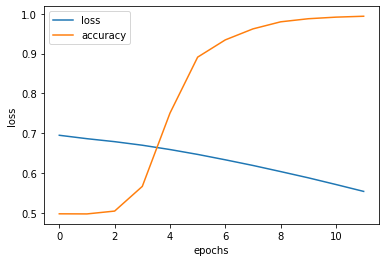

In [12]:
# Plot history
import pandas as pd
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [13]:
# Save the model
first_model.save("binary_classification_model.h5")

In [14]:
# Download the model from Google Colab
from google.colab import files
files.download("/content/binary_classification_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model 
model_2.fit(X, y,epochs=5)

Epoch 1/5
313/313 [==============================] - 1s 1ms/step - loss: 0.8730 - accuracy: 0.4962
Epoch 2/5
313/313 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4964
Epoch 3/5
313/313 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4960
Epoch 4/5
313/313 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5015
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4997


In [16]:
# Lets try and improve our model by training for longer..
model_2.fit(X, y, epochs=200)
model_2.evaluate(X, y)

Epoch 1/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4958
Epoch 2/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4954
Epoch 3/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4960
Epoch 4/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5015
Epoch 5/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4997
Epoch 6/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4953
Epoch 7/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4883
Epoch 8/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4974
Epoch 9/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4977
Epoch 10/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6940 - accura

[0.6936948299407959, 0.5004000067710876]

Since we're working on a binary classification problem and our model is getting around 50% accuaracy... it's performing as it's guessing 🇸

Try to add an extra layer?

In [17]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model, with 2 layers
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100)

Epoch 1/100
313/313 [==============================] - 1s 1ms/step - loss: 0.7659 - accuracy: 0.5057
Epoch 2/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4978
Epoch 3/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4989
Epoch 4/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5024
Epoch 5/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5007
Epoch 6/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5011
Epoch 7/100
313/313 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4919
Epoch 8/100
313/313 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4893
Epoch 9/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5031
Epoch 10/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6937 - accura

In [18]:
# 4. Evaluate the model(ON THE SAME DATA WE TRAINED ON, BIG NO-NO)
model_3.evaluate(X, y)

313/313 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932647824287415, 0.5]

In [19]:
# There are 5K of each color, not that good neural network :P
circles["label"].value_counts()

1    5000
0    5000
Name: label, dtype: int64

## Improving our model

1. Create a model - more layers and hidden units
2. Compile a model - choose a diffirent optimization function
3. Fitting a model - more epochs

## Common ways to improve a deep model:
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Fitting for longer

In [20]:
# Set random seed
tf.random.set_seed(42)

# 1. Create te model
model_4 =  tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                               
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]    
)

# 3. Fit the model
model_4.fit(X, y, epochs=100)

Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 0.9536 - accuracy: 0.4919
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5005
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4941
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.4923
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.5028
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6960 - accuracy: 0.4941
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.4926
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6969 - accuracy: 0.4978
Epoch 9/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6962 - accuracy: 0.5006
Epoch 10/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6969 - accura

In [21]:
# 4. Evaluate the model, NOT IDEAL TO EVALUATE ON THE SAME DATASET WE'RE TRAINING ON.. :P
model_4.evaluate(X, y)

313/313 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6934003829956055, 0.5]

To visulize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in trained model, features (X) and labels (y)
* Create a [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)




In [22]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


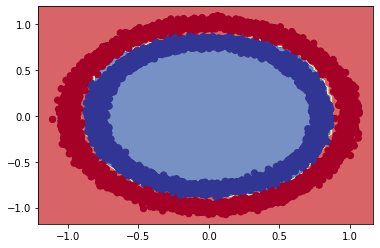

In [23]:
# Check out the predictions our model is making
plot_decision_boundary(first_model, X, y)  


In [24]:
# Let's see if out model can be used for a regresion problem.

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X +100 (Thats the relationship between X and Y)

# Split the regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data

We are working on a regression problem

To compile the model we need to re-write `model_4` since its for a binary classification problem


In [25]:
# Random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 11ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s

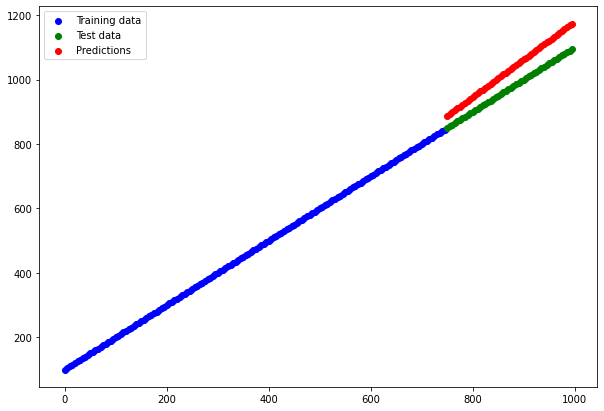

In [26]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [33]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)                           
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy, # or as string "binary_crossentropy"
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(#tf.expand_dims(X, axis=-1), y, epochs=100)
                      X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


313/313 [==============================] - 1s 2ms/step - loss: 3.9494 - accuracy: 0.4284
Epoch 2/100
313/313 [==============================] - 0s 2ms/step - loss: 2.4893 - accuracy: 0.4431
Epoch 3/100
313/313 [==============================] - 0s 2ms/step - loss: 0.8189 - accuracy: 0.4549
Epoch 4/100
313/313 [==============================] - 0s 2ms/step - loss: 0.7600 - accuracy: 0.4607
Epoch 5/100
313/313 [==============================] - 0s 1ms/step - loss: 0.7299 - accuracy: 0.4659
Epoch 6/100
313/313 [==============================] - 0s 2ms/step - loss: 0.7125 - accuracy: 0.4706
Epoch 7/100
313/313 [==============================] - 0s 1ms/step - loss: 0.7027 - accuracy: 0.4733
Epoch 8/100
313/313 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4778
Epoch 9/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.4788
Epoch 10/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4834
E

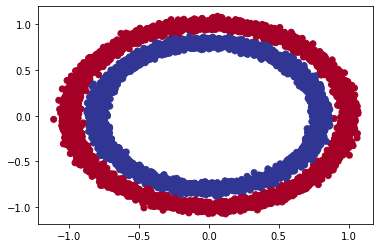

In [34]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu); # cm = ColorMap

doing binary classifcation...


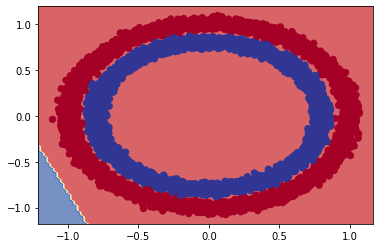

In [35]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function.

In [41]:
#Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)                               
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
313/313 [==============================] - 1s 1ms/step - loss: 3.9494 - accuracy: 0.4284
Epoch 2/100
313/313 [==============================] - 0s 1ms/step - loss: 2.4893 - accuracy: 0.4431
Epoch 3/100
313/313 [==============================] - 0s 1ms/step - loss: 0.8189 - accuracy: 0.4549
Epoch 4/100
313/313 [==============================] - 0s 1ms/step - loss: 0.7600 - accuracy: 0.4607
Epoch 5/100
313/313 [==============================] - 0s 1ms/step - loss: 0.7299 - accuracy: 0.4659
Epoch 6/100
313/313 [==============================] - 0s 1ms/step - loss: 0.7125 - accuracy: 0.4706
Epoch 7/100
313/313 [==============================] - 0s 1ms/step - loss: 0.7027 - accuracy: 0.4733
Epoch 8/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.4778
Epoch 9/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.4788
Epoch 10/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6937 - accura

## Test own variant

In [42]:
#Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_playground = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation=tf.keras.activations.tanh),
  tf.keras.layers.Dense(8, activation=tf.keras.activations.tanh),
  tf.keras.layers.Dense(2, activation=tf.keras.activations.tanh)                               
])

# 2. Compile the model
model_playground.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_playground.fit(X, y, epochs=1000)

Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


313/313 [==============================] - 1s 2ms/step - loss: 1.5954 - accuracy: 0.5046
Epoch 2/1000
313/313 [==============================] - 1s 2ms/step - loss: 0.6826 - accuracy: 0.5072
Epoch 3/1000
313/313 [==============================] - 1s 2ms/step - loss: 0.6749 - accuracy: 0.5243
Epoch 4/1000
313/313 [==============================] - 1s 2ms/step - loss: 0.6708 - accuracy: 0.5486
Epoch 5/1000
313/313 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.5692
Epoch 6/1000
313/313 [==============================] - 1s 2ms/step - loss: 0.6609 - accuracy: 0.5722
Epoch 7/1000
313/313 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5670
Epoch 8/1000
313/313 [==============================] - 1s 2ms/step - loss: 0.6448 - accuracy: 0.5647
Epoch 9/1000
313/313 [==============================] - 0s 2ms/step - loss: 0.6291 - accuracy: 0.5625
Epoch 10/1000
313/313 [==============================] - 0s 2ms/step - loss: 0.6060 - accuracy:

doing multiclass classification...


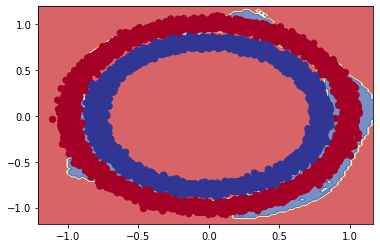

In [43]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_playground,
                       X=X,
                       y=y)